In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Preprocessing

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Handling the missing Values
df = df.drop(columns='Cabin', axis=1)

In [8]:
# Replacing missing Age values with mean value of dataset
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
# Dealing with 1 Fare missing VAlue and replace it with most occured value
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis & Data Visualization


In [12]:
df['PassengerId'].unique().shape

(418,)

In [13]:
df.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

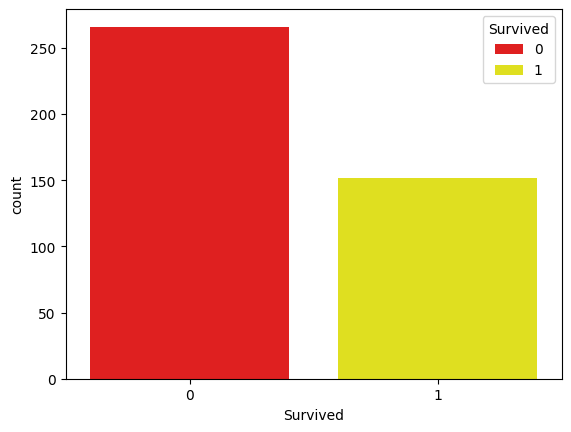

In [14]:
sns.countplot(x='Survived', data=df, hue='Survived', palette=['red','yellow'])

<Axes: xlabel='Sex', ylabel='count'>

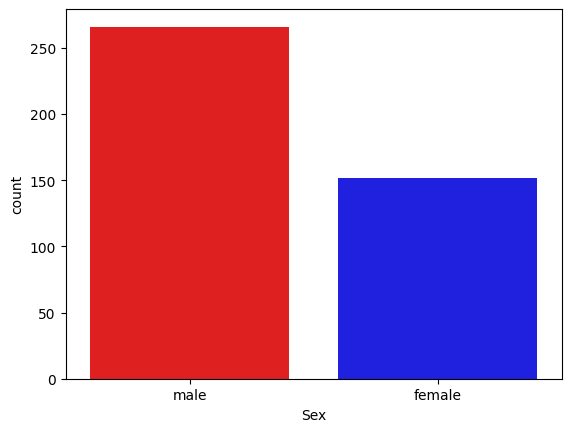

In [15]:
sns.countplot(x='Sex', data=df ,hue='Sex', palette=['red','blue'])

In [16]:
df.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Text(0, 0.5, 'count')

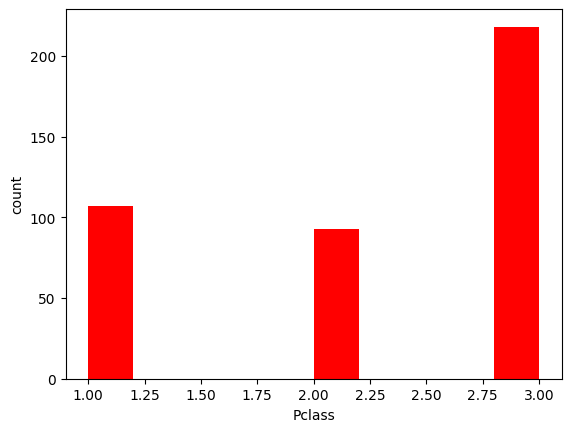

In [17]:
plt.hist(df.Pclass, color = 'red')
plt.xlabel('Pclass')
plt.ylabel('count')

<Axes: xlabel='Pclass', ylabel='count'>

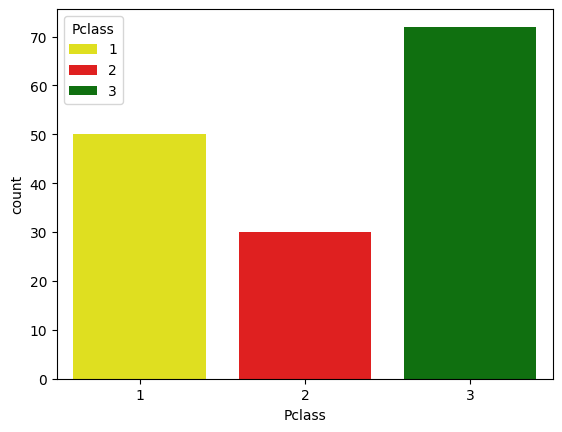

In [18]:
sns.countplot(df[df['Survived'] == 1], x='Pclass',hue='Pclass', palette=['yellow','red', 'green'])

<Axes: xlabel='Survived', ylabel='Age'>

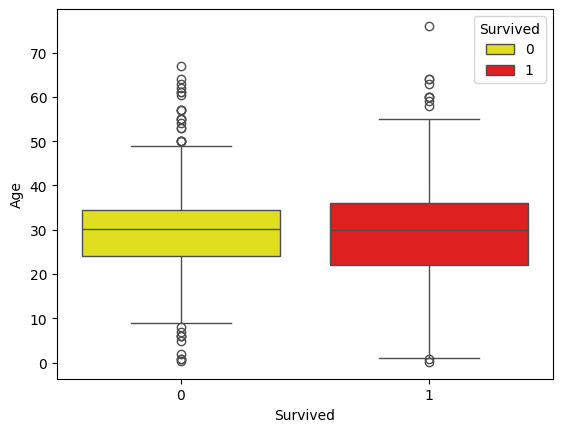

In [19]:
sns.boxplot(df, x='Survived', y='Age', hue='Survived', palette=['yellow', 'red'])

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Encoding the Categorical values

In [21]:
df.Sex.value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [22]:
df.Embarked.value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [23]:
# converting categorical values into numbers using label encoding
df.replace({'Sex': {'male': 0, 'female':1}, 'Embarked': {'S': 0, 'C':1, 'Q': 2}}, inplace=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


### Separating Features & Targets

In [25]:
X = df.drop(columns=['PassengerId', 'Ticket', 'Name', 'Survived'], axis = 1)
Y = df['Survived']

In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [27]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Splitting Data and Evaluating Results

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [31]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,Y_train)

LogisticRegression()

In [32]:
Dec_tree_model = DecisionTreeClassifier()
Dec_tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

In [34]:
KN_model = KNeighborsClassifier()
KN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
SVC_model = SVC()
SVC_model.fit(X_train,Y_train)

SVC()

In [36]:
y_pred1=log_reg_model.predict(X_test)
y_pred2=Dec_tree_model.predict(X_test)
y_pred3=RF_model.predict(X_test)
y_pred4=KN_model.predict(X_test)
y_pred5=SVC_model.predict(X_test)

In [37]:
accuracy_score(Y_test,y_pred1)

1.0

In [38]:
accuracy_score(Y_test,y_pred2)

1.0

In [39]:
accuracy_score(Y_test,y_pred3)

1.0

In [40]:
accuracy_score(Y_test,y_pred4)

0.6904761904761905

In [41]:
accuracy_score(Y_test,y_pred5)

0.6309523809523809

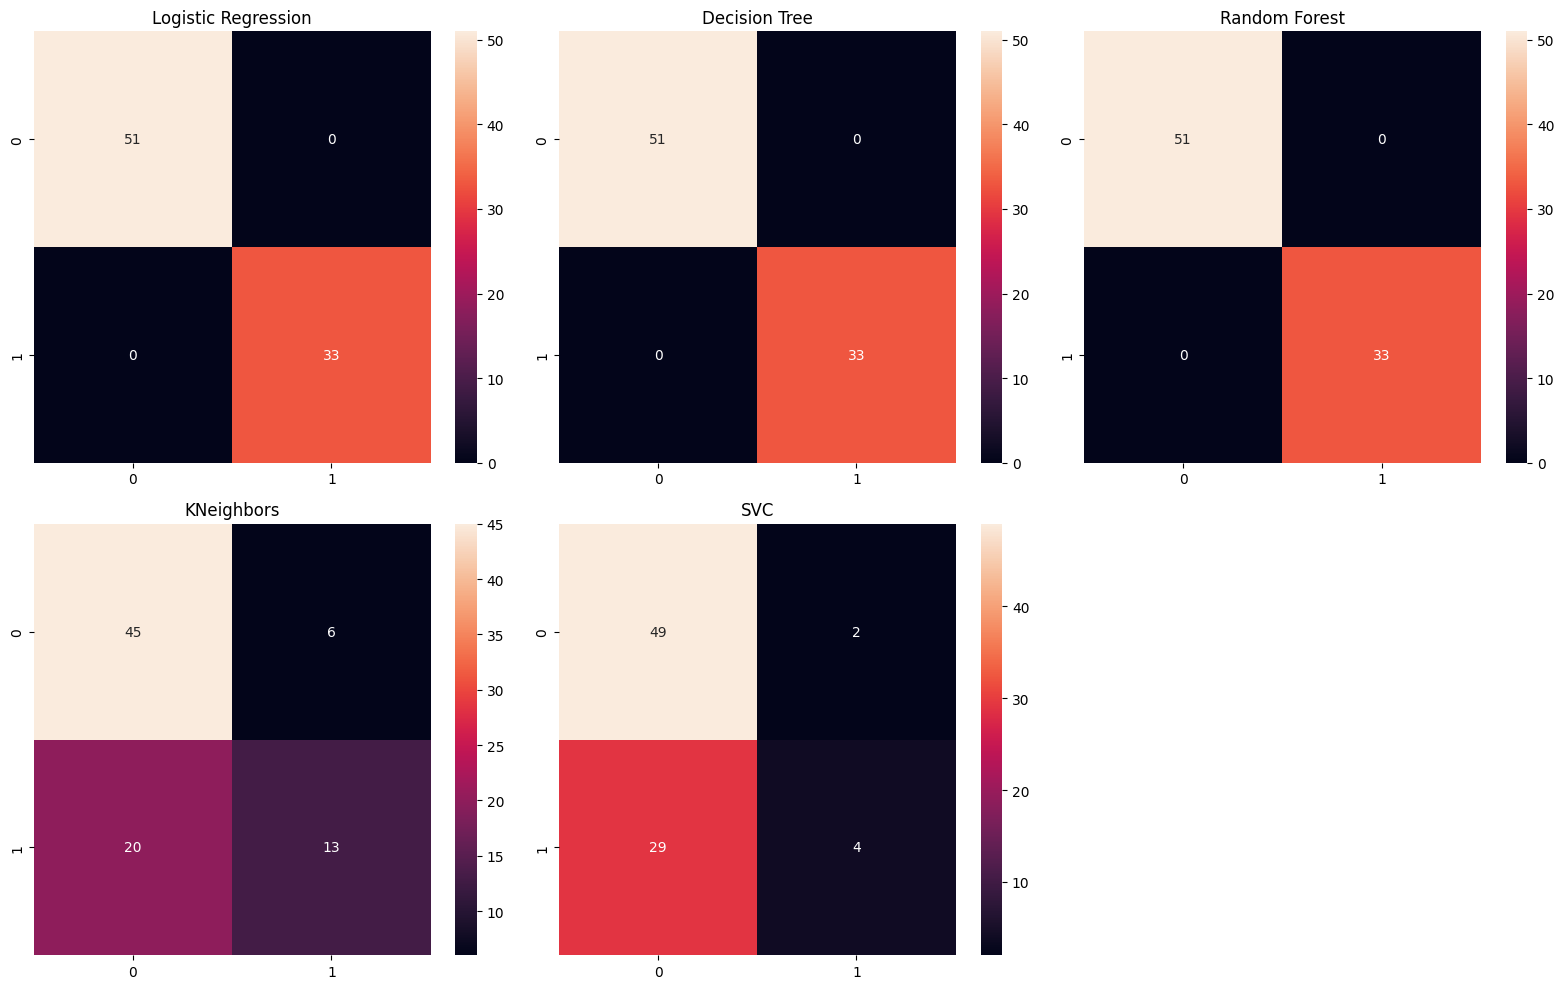

In [42]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
sns.heatmap(confusion_matrix(Y_test, y_pred1), annot=True, fmt='d')
plt.title('Logistic Regression')
plt.subplot(2, 3, 2)
sns.heatmap(confusion_matrix(Y_test, y_pred2), annot=True, fmt='d')
plt.title('Decision Tree')
plt.subplot(2, 3, 3)
sns.heatmap(confusion_matrix(Y_test, y_pred3), annot=True, fmt='d')
plt.title('Random Forest')
plt.subplot(2, 3, 4)
sns.heatmap(confusion_matrix(Y_test, y_pred4), annot=True, fmt='d')
plt.title('KNeighbors')
plt.subplot(2, 3, 5)
sns.heatmap(confusion_matrix(Y_test, y_pred5), annot=True, fmt='d')
plt.title('SVC')
plt.tight_layout()